In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA.data import loading_tools
from JPAS_DA.data import cleaning_tools
from JPAS_DA.data import crossmatch_tools

import numpy as np

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

In [2]:
root_path = "/home/dlopez/Documents/Projects/JPAS_Domain_Adaptation/DATA/noise_jpas_v1/Train-Validate-Test"

load_JPAS_data = [{
    "name": "all",
    "npy": "JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy",
    "csv": "JPAS_DATA_PROPERTIES.csv",
    "sample_percentage": 1.0  # Optional, defaults to 1.0
}]

load_DESI_data = [
{
    "name": "train",
    "npy": "mock_3_train.npy",
    "csv": "props_training.csv",
    "sample_percentage": 0.6
},
{
    "name": "val",
    "npy": "mock_3_validate.npy",
    "csv": "props_validate.csv",
    "sample_percentage": 1.0
},
{
    "name": "test",
    "npy": "mock_3_test.npy",
    "csv": "props_test.csv",
    "sample_percentage": 1.0
}
]

random_seed_load = 42

In [3]:
DATA = loading_tools.load_dsets(root_path=root_path, datasets_jpas=load_JPAS_data, datasets_desi=load_DESI_data, random_seed=random_seed_load)

2025-05-16 12:48:19,047 - INFO - 📥 Starting full dataset loading with `load_dsets()`
2025-05-16 12:48:19,048 - INFO - ├ Loading JPAS datasets...
2025-05-16 12:48:19,048 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-05-16 12:48:19,048 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-05-16 12:48:19,096 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-05-16 12:48:19,111 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-05-16 12:48:19,112 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-05-16 12:48:19,113 - INFO - ├ Loading DESI datasets (splitted)...
2025-05-16 12:48:19,113 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-05-16 12:48:19,113 - INFO - |    ├─── 🔹 Dataset: train
2025-05-16 12:48:20,042 - INFO - |    |    ✔ CSV loaded ((1087882, 18)), Size: 445.74 MB
2025-05-16 12:48:20,043 - INFO - |    |    ✔ NPY loaded ((1087882, 57, 3)), Size: 1488.22 MB
2025-05-16 12:48:20,053 - I

In [4]:
print(DATA['JPAS'].keys())
print(DATA['JPAS']["all_observations"].shape)
print(DATA['JPAS']["all_errors"].shape)
print(DATA['JPAS']["all_pd"].keys())
print(DATA['JPAS']["all_pd"]['TARGETID'].shape)
print()

print(DATA['DESI'].keys())
print(DATA['DESI']["all_np"].shape)
print(DATA['DESI']["all_pd"].keys())
print(DATA['DESI']["all_pd"]['TARGETID'].shape)

dict_keys(['all_pd', 'all_observations', 'all_errors'])
(52020, 57)
(52020, 57)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])
(52020,)

dict_keys(['all_pd', 'all_np'])
(1118965, 57, 3)
dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE'])
(1118965,)


In [5]:
dict_clean_data_options = {
    "apply_masks"         : ["unreliable", "magic_numbers", "negative_errors", "nan_values", "apply_additional_filters"],
    "mask_indices"        : [0, -2],
    "magic_numbers"       : [-99, 99],
    "i_band_sn_threshold" : 0,
    "z_lim_QSO_cut"       : 2.2
}

In [6]:
DATA_clean = cleaning_tools.clean_and_mask_data(
    DATA=DATA,
    apply_masks=dict_clean_data_options["apply_masks"],
    mask_indices=dict_clean_data_options["mask_indices"],
    magic_numbers=dict_clean_data_options["magic_numbers"],
    i_band_sn_threshold=dict_clean_data_options["i_band_sn_threshold"],
    z_lim_QSO_cut=dict_clean_data_options["z_lim_QSO_cut"]
)

2025-05-16 12:48:21,277 - INFO - 🧽 Cleaning and masking data...
2025-05-16 12:48:21,277 - INFO - ├── remove_invalid_NaN_rows()
2025-05-16 12:48:21,540 - INFO - │   ├── # objects filled with NaNs in JPAS: 0(0.0%)
2025-05-16 12:48:21,541 - INFO - │   ├── # objects filled with NaNs in DESI: 724(0.06%)
2025-05-16 12:48:22,103 - INFO - ├── 🧹 Deleted cleaned DATA_clean dictionary to free memory.
2025-05-16 12:48:22,103 - INFO - ├── apply_additional_filters()
2025-05-16 12:48:22,116 - INFO - │   ├── JPAS: 52020 valid rows (S/N ≥ 0) (100.0%)
2025-05-16 12:48:22,116 - INFO - │   ├── DESI: 1118241 valid rows (S/N ≥ 0) (100.0%)
2025-05-16 12:48:22,464 - INFO - │   ├── Additional filters applied successfully.
2025-05-16 12:48:22,466 - INFO - ├── Masking out indices [0, -2] (unreliable in DESI).
2025-05-16 12:48:23,141 - INFO - │   ├── Updated JPAS obs/err shape: (52020, 55)
2025-05-16 12:48:23,141 - INFO - │   ├── Updated DESI mean/err shape: (1118241, 55)
2025-05-16 12:48:23,143 - INFO - ├── Chec

In [7]:
print(DATA_clean['JPAS']['TARGETID'].shape)
print(DATA_clean['DESI']['TARGETID'].shape)

(52020,)
(1118241,)


In [8]:
Dict_LoA = {"both":{}, "only":{}} # Dictionary of Lists of Arrays (LoA) indicating, for each TARGETID, the associatted entries in the arrays, e.g. TARGETID[LoA[ii][0]] == TARGETID[LoA[ii][-1]]
(
    IDs_only_DESI, IDs_only_JPAS, IDs_both,
    Dict_LoA["only"]["DESI"], Dict_LoA["only"]["JPAS"],
    Dict_LoA["both"]["DESI"], Dict_LoA["both"]["JPAS"]
) = crossmatch_tools.crossmatch_IDs_two_datasets(
    DATA_clean["DESI"]['TARGETID'], DATA_clean["JPAS"]['TARGETID']
)

2025-05-16 12:48:25,404 - INFO - 🔍 crossmatch_IDs_two_datasets()...
2025-05-16 12:48:25,404 - INFO - ├── 🚀 Starting ID categorization process...
2025-05-16 12:48:25,418 - INFO - |    ├── 📌 Found 1107618 unique IDs across 2 arrays.
2025-05-16 12:48:25,650 - INFO - |    ├── Presence matrix created with shape: (2, 1107618)
2025-05-16 12:48:25,653 - INFO - |    ├── Category mask created with shape: (2, 1107618)
2025-05-16 12:48:25,653 - INFO - ├── 🚀 Starting index retrieval process...
2025-05-16 12:48:25,653 - INFO - |    ├── 📌 Processing 1107618 unique IDs across 2 arrays.
2025-05-16 12:48:26,056 - INFO - ├── 🚀 Starting post-processing of unique IDs across two arrays...
2025-05-16 12:48:26,073 - INFO - |    ├── Processing complete: 1055598 IDs only in Array 1 (95.3%).
2025-05-16 12:48:26,074 - INFO - |    ├── Processing complete: 13993 IDs only in Array 2 (1.26%).
2025-05-16 12:48:26,074 - INFO - |    ├── Processing complete: 38027 IDs in both arrays (3.43%).
2025-05-16 12:48:26,074 - INF

In [9]:
print(len(Dict_LoA["only"]["DESI"]))
print(len(np.concatenate(Dict_LoA["only"]["DESI"])))
print()
print(len(Dict_LoA["only"]["JPAS"]))
print(len(np.concatenate(Dict_LoA["only"]["JPAS"])))
print()
print(len(Dict_LoA["both"]["DESI"]))
print(len(np.concatenate(Dict_LoA["both"]["DESI"])))
print()
print(len(Dict_LoA["both"]["JPAS"]))
print(len(np.concatenate(Dict_LoA["both"]["JPAS"])))
print()
print(len(np.concatenate(Dict_LoA["only"]["DESI"])) + len(np.concatenate(Dict_LoA["both"]["DESI"])))
print(len(np.concatenate(Dict_LoA["only"]["JPAS"])) + len(np.concatenate(Dict_LoA["both"]["JPAS"])))

1055598
1078811

13993
13993

38027
39430

38027
38027

1118241
52020


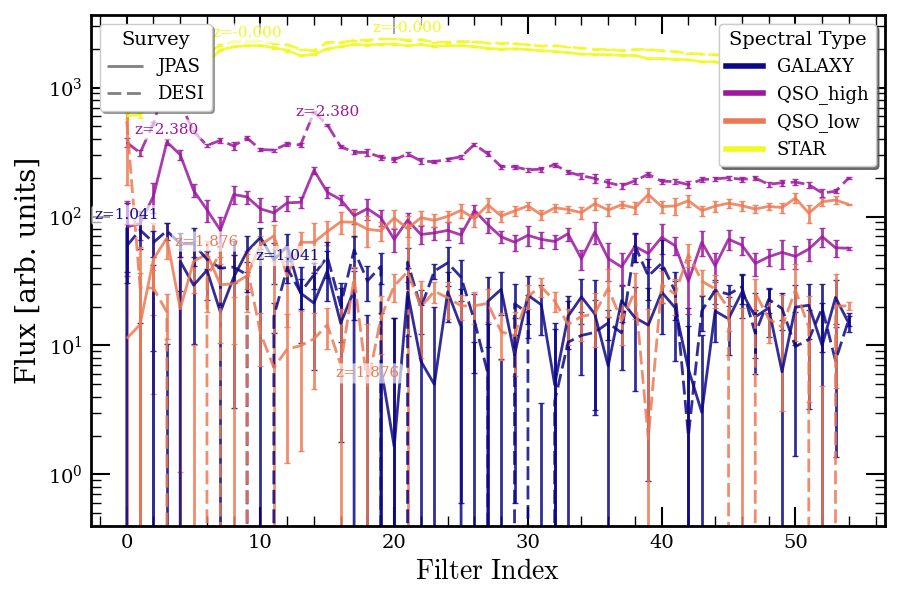

In [10]:
survey_key = "JPAS"
NN = 1

idxs_matched_JPAS = np.concatenate(Dict_LoA["both"][survey_key])
matched_JPAS_SPECTYPE_int = DATA_clean[survey_key]["SPECTYPE_int"][idxs_matched_JPAS]
matched_JPAS_TARGETID = DATA_clean[survey_key]["TARGETID"][idxs_matched_JPAS]

unique_spectype_int_labels = np.unique(DATA_clean[survey_key]["SPECTYPE_int"])
unique_spectype_labels = np.unique(DATA_clean[survey_key]["SPECTYPE"])

sampled_TARGETIDs = []
for ii, label in enumerate(unique_spectype_int_labels):
    
    tmp_idxs = np.where(matched_JPAS_SPECTYPE_int == label)[0]
    tmp_TARGETIDs = matched_JPAS_TARGETID[tmp_idxs]
    tmp_SPECTYPE_ints = matched_JPAS_SPECTYPE_int[tmp_idxs]

    tmp_idxs = np.random.choice(len(tmp_TARGETIDs), NN, replace=False)
    sampled_TARGETIDs.append(tmp_TARGETIDs[tmp_idxs])
sampled_TARGETIDs = np.array(sampled_TARGETIDs)



fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlabel(r'$\mathrm{Filter~Index}$', fontsize=20)
ax.set_ylabel(r'Flux [arb. units]', fontsize=20)

colors = plotting_utils.get_N_colors(len(unique_spectype_labels), colormap=plt.cm.plasma)
linestyles = plotting_utils.get_N_linestyles(2)  # "JPAS", "DESI"

# Store legend handles
survey_handles = []
spectype_handles = []
ll = 0
for ii, key_survey in enumerate(["JPAS", "DESI"]):
    for jj, spectype in enumerate(unique_spectype_labels):
        for kk in range(NN):
            tmp_TARGETID = sampled_TARGETIDs[jj][kk]
            tmp_idxs = np.where(DATA_clean[key_survey]["TARGETID"] == tmp_TARGETID)[0]

            for tmp_idx in tmp_idxs:
                tmp_obs = DATA_clean[key_survey]["OBS"][tmp_idx]
                tmp_errors = DATA_clean[key_survey]["ERR"][tmp_idx]
                redshift = DATA_clean[key_survey]["REDSHIFT"][tmp_idx]

                # Plot with error bars
                ax.errorbar(
                    np.arange(len(tmp_obs)), tmp_obs, yerr=tmp_errors,
                    capsize=2, lw=2., ls=linestyles[ii],
                    color=colors[jj], ecolor=colors[jj], alpha=0.85
                )

                # Annotate redshift near mid-point
                mid_idx = ll * 3
                mid_y = tmp_obs[mid_idx]
                ax.text(
                    mid_idx, mid_y * 1.1, f"z={redshift:.3f}",
                    fontsize=11, color=colors[jj], ha='center', va='bottom',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.65, boxstyle="round,pad=0.2")
                )
                ll += 1

# Horizontal baseline
ax.axhline(0, ls='--', lw=0.7, color='black', alpha=0.4)

# Adjust tick label size
ax.tick_params(axis='both', labelsize=14)

# Legend for survey (linestyle)
survey_handles = [
    mpl.lines.Line2D([0], [0], color="gray", linestyle=linestyles[0], lw=2, label="JPAS"),
    mpl.lines.Line2D([0], [0], color="gray", linestyle=linestyles[1], lw=2, label="DESI"),
]
legend = ax.legend(handles=survey_handles, loc='upper left', fancybox=True, shadow=True,
                   fontsize=13, title="Survey", title_fontsize=14)
ax.add_artist(legend)

# Legend for spectypes (colors)
spectype_handles = [
    mpl.lines.Line2D([0], [0], color=colors[jj], lw=4, label=spectype)
    for jj, spectype in enumerate(unique_spectype_labels)
]
legend1 = ax.legend(handles=spectype_handles, loc='upper right', fancybox=True, shadow=True,
                    fontsize=13, title="Spectral Type", title_fontsize=14)
ax.add_artist(legend1)

# Y scale and plot style
ax.set_yscale("log")

plt.tight_layout()
plt.show()